# 2.1 - Series Temporales

![time_series](images/time_series.jpg)

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import pylab as plt

In [2]:
df=pd.read_csv('data/occupancy.csv')

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2664 non-null   object 
 1   Temperature    2664 non-null   float64
 2   Humidity       2664 non-null   float64
 3   Light          2664 non-null   float64
 4   CO2            2664 non-null   float64
 5   HumidityRatio  2664 non-null   float64
 6   Occupancy      2664 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.8+ KB


In [4]:
df['datetime']=pd.to_datetime(df.date)

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1,2015-02-02 14:00:00
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1,2015-02-02 15:00:00
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1,2015-02-02 16:00:00
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1,2015-02-02 17:00:00
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1,2015-02-02 18:00:00


In [5]:
df=df.set_index('datetime')

df.drop(columns=['date'], inplace=True)

df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
datetime,,,,,,
2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


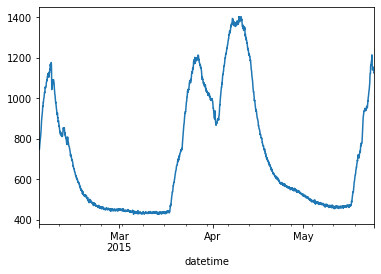

In [6]:
df.CO2.plot();

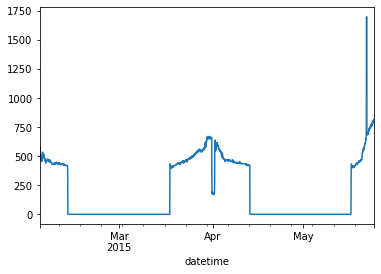

In [7]:
df.Light.plot();

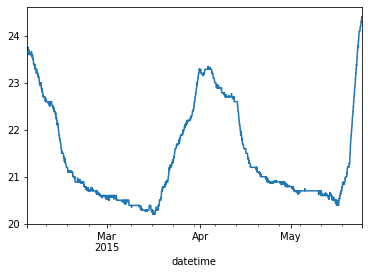

In [8]:
df.Temperature.plot();

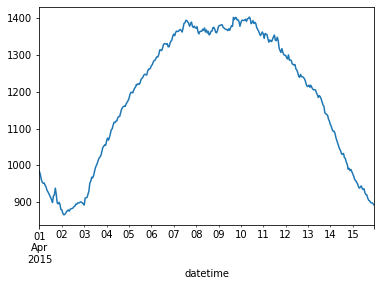

In [9]:
dias=df.CO2.loc['2015-4-1':'2015-4-15']

dias.plot();

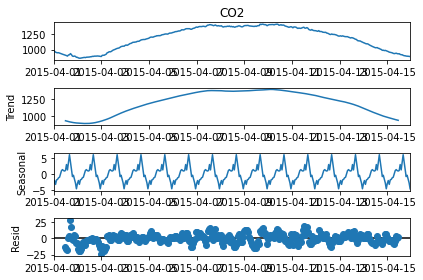

In [10]:
import statsmodels.api as sm

res=sm.tsa.seasonal_decompose(dias)

resplot=res.plot();

### Autoregresión - AR

El modelo usa la relación de dependencia del momento actual con $n$ momentos anteriores. Es, en realidad, una regresión lineal.

$$y_t = \beta_0+\beta_1y_{t-1}+\beta_2y_{t-2}+\ldots+\beta_ny_{t-n}+\epsilon_t$$

Si solamente nos fijamos en el momento anterior, $t-1$, entonces:

$$y_t = \beta_0+\beta_1y_{t-1}+\epsilon_t$$

Es la llamada Cadena de Markov

In [11]:
from pandas.plotting import lag_plot

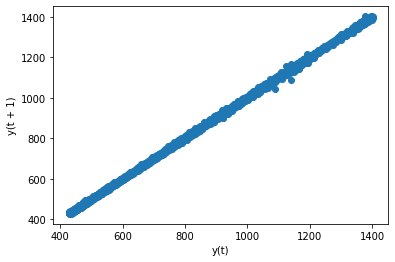

In [12]:
lag_plot(df.CO2);

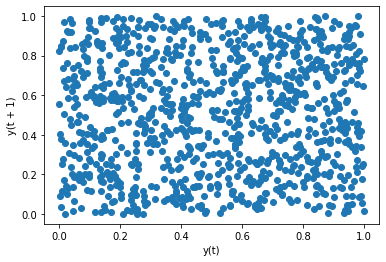

In [13]:
lag_plot(pd.Series(np.random.random(1000)));

In [14]:
# modelo AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [15]:
train, test = df.CO2[:-10], df.CO2[-10:]

In [16]:
modelo=AR(train, 1).fit() # cadena de Markov, lag=1

/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [17]:
pred=modelo.predict(len(train), len(df.CO2)-1)

error=(pred-test).abs().sum()/len(pred)  # mae

error

0.0

In [18]:
res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

,real,pred,diff
2015-05-24 04:00:00,1153.250000,NaN,NaN
2015-05-24 05:00:00,1152.400000,NaN,NaN
2015-05-24 06:00:00,1146.166667,NaN,NaN
2015-05-24 07:00:00,1145.400000,NaN,NaN
2015-05-24 08:00:00,1140.800000,NaN,NaN
2015-05-24 09:00:00,1150.250000,NaN,NaN
2015-05-24 10:00:00,1129.200000,NaN,NaN
2015-05-24 11:00:00,1125.800000,NaN,NaN
2015-05-24 12:00:00,1123.000000,NaN,NaN
2015-05-24 13:00:00,1124.000000,NaN,NaN


In [19]:
for i in range(1, 100, 10):
    modelo=AR(train, i).fit()
    pred=modelo.predict(len(train), len(df.CO2)-1)     # la prediccion en el intervalo
    error=(pred-test).abs().sum()/len(pred)            # error medio absoluto
    print ('Error mae: ', error.round(5), '  Maxlag : ', i)

/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/iudh/opt/anaconda3/envs/c

Error mae:  0.0   Maxlag :  1
Error mae:  0.0   Maxlag :  11
Error mae:  0.0   Maxlag :  21
Error mae:  0.0   Maxlag :  31
Error mae:  0.0   Maxlag :  41
Error mae:  0.0   Maxlag :  51
Error mae:  0.0   Maxlag :  61
Error mae:  0.0   Maxlag :  71
Error mae:  0.0   Maxlag :  81
Error mae:  0.0   Maxlag :  91


/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


### Media Móvil (Moving Average MA)

Una manera matemática de expresar la MA puede ser:

$$y_t = \beta_0+\epsilon_t+\epsilon_{t-1}\phi_{t-1}+\epsilon_{t-2}\phi_{t-2}+\ldots+\epsilon_{t-n}\phi_{t-n}$$


Se usa la relación entre las observaciones y el error residual de la media móvil.

Otra es la evidente, la media móvil, se muestra en el gráfico.

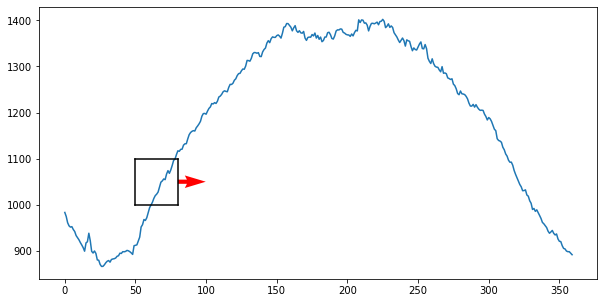

In [20]:
plt.figure(figsize=(10, 5))

plt.plot(dias.values)

plt.plot([50, 80],[1000, 1000], color='black')
plt.plot([50, 50],[1000, 1100], color='black')
plt.plot([50, 80],[1100, 1100], color='black')
plt.plot([80, 80],[1000, 1100], color='black')

plt.quiver(80, 1050, 1, 0, scale=20, color='r');

### ARMA (AutoRegressive Moving Average)

Unión de ambos conceptos.

$$y_t = \beta_0 + \epsilon_t + \sum_{i=1}^{n}\beta_iy_{t-i} + \sum_{i=1}^{m}\phi_i\epsilon_{t-i}$$

In [21]:
# ARMA  order==> p=>AR (n, maxlag), q=>MA (m, ancho de la ventana)

from statsmodels.tsa.arima_model import ARMA

In [22]:
#help(ARIMA)

In [29]:
%%time

modelo=ARMA(train, order=(9, 3)).fit(disp=False)

2022-03-01 09:46:29,551 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'

2022-03-01 09:46:37,650 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "



CPU times: user 14.2 s, sys: 35.6 s, total: 49.8 s
Wall time: 8.1 s


In [30]:
pred=modelo.predict(len(train), len(df.CO2)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)

res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Error mae:  14.721007044945827


,real,pred,diff
2015-05-24 04:00:00,1153.250000,1152.419882,-0.830118
2015-05-24 05:00:00,1152.400000,1152.776372,0.376372
2015-05-24 06:00:00,1146.166667,1152.720988,6.554321
2015-05-24 07:00:00,1145.400000,1153.012002,7.612002
2015-05-24 08:00:00,1140.800000,1153.355282,12.555282
2015-05-24 09:00:00,1150.250000,1153.699252,3.449252
2015-05-24 10:00:00,1129.200000,1154.080929,24.880929
2015-05-24 11:00:00,1125.800000,1154.352560,28.552560
2015-05-24 12:00:00,1123.000000,1154.601382,31.601382
2015-05-24 13:00:00,1124.000000,1154.797854,30.797854


### ARIMA (AutoRegressive Integrated Moving Average)

Lo de Integrated trata de hacer la serie temporal estacionaria, similar al concepto de PID.

In [33]:
%%time

# ARIMA  order==> (p, d, q)  d=>Integrated
from statsmodels.tsa.arima_model import ARIMA

modelo=ARIMA(train, order=(4, 2, 2)).fit(disp=False)

                     
pred=modelo.predict(len(train), len(df.CO2)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

2022-03-01 09:52:54,547 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'

2022-03-01 09:52:54,550 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'



Error mae:  1139.215293370495
CPU times: user 1.72 s, sys: 2.69 s, total: 4.41 s
Wall time: 1.28 s


,real,pred,diff
2015-05-24 04:00:00,1153.250000,-2.076543,-1155.326543
2015-05-24 05:00:00,1152.400000,-0.000914,-1152.400914
2015-05-24 06:00:00,1146.166667,0.231856,-1145.934811
2015-05-24 07:00:00,1145.400000,0.045622,-1145.354378
2015-05-24 08:00:00,1140.800000,-0.068862,-1140.868862
2015-05-24 09:00:00,1150.250000,-0.021041,-1150.271041
2015-05-24 10:00:00,1129.200000,0.007443,-1129.192557
2015-05-24 11:00:00,1125.800000,0.003471,-1125.796529
2015-05-24 12:00:00,1123.000000,-0.003685,-1123.003685
2015-05-24 13:00:00,1124.000000,-0.003613,-1124.003613


### ADF-test (testeo de la estacionaridad)

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

### SARIMA (Seasonal AutoRegressive Integrated Moving Average)
Arima por estaciones.

### SARIMAX (Seasonal AutoRegressive Integrated Moving Average Exogenous)
SARIMA con regresores exógenos.

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [43]:
%%time

modelo=SARIMAX(endog=train, 
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(4, 1, 5, 2) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(train), len(df.CO2)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

2022-03-01 10:03:18,506 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'

2022-03-01 10:03:18,511 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'

2022-03-01 10:03:23,268 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "



Error mae:  23.634354367712966
CPU times: user 8.11 s, sys: 20.7 s, total: 28.8 s
Wall time: 5.04 s


,real,pred,diff
2015-05-24 04:00:00,1153.250000,1155.949143,2.699143
2015-05-24 05:00:00,1152.400000,1155.660175,3.260175
2015-05-24 06:00:00,1146.166667,1159.908692,13.742025
2015-05-24 07:00:00,1145.400000,1159.585052,14.185052
2015-05-24 08:00:00,1140.800000,1163.102261,22.302261
2015-05-24 09:00:00,1150.250000,1162.467917,12.217917
2015-05-24 10:00:00,1129.200000,1165.692923,36.492923
2015-05-24 11:00:00,1125.800000,1165.463698,39.663698
2015-05-24 12:00:00,1123.000000,1169.612019,46.612019
2015-05-24 13:00:00,1124.000000,1169.168332,45.168332


In [45]:
#help(SARIMAX)

## FB-Prophet

https://facebook.github.io/prophet/docs/quick_start.html

In [24]:
#!pip install fbprophet
#!conda install -c conda-forge fbprophet